Começamos fazendo as importações necessárias para o trabalho.

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Começamos criando diferentes tipos de tensores:

- **a**: é uma matriz 2x3 com valores definidos manualmente.
- **b**: é um tensor 3x3x3 preenchido com zeros.
- **c**: é um vetor de 10 valores igualmente espaçados entre 0 e 1.
- **d**: é uma matriz 1x3 preenchida com valores 1.

In [13]:
a = torch.tensor([[0., 2., 4.], [3., 5., 7.]])  # shape (2, 3)
b = torch.zeros(3, 3, 3)  # shape (3, 3, 3)
c = torch.linspace(0, 1, 10)  # shape (x)
d = torch.ones(1, 3)  # shape (1, 3)

- **a.size()**: retorna o tamanho (shape) do tensor a, que é (2, 3).
- **a[0, 0]**: acessa o primeiro elemento (linha 0, coluna 0).
- **a[:, 0]**: retorna todos os valores da primeira coluna.
- **a[-1, -1]**: acessa o último elemento da última linha.
- **b[0, :, :]**: seleciona a primeira "fatia" do tensor tridimensional b.
- **a[0, 1:3]**: retorna os elementos das colunas 1 e 2 da primeira linha.

In [14]:
a.size()  # dimensions

a[0, 0]  # 0th element
a[:, 0]  # first order tensor along 0th dimension (returns all rows in 0th column)
a[-1, -1]  # last element (7.)
b[0, :, :]  # 0th second order tensor
a[0, 1:3]  # last two elements of the 0th first order tensor (2., 4.)

tensor([2., 4.])

## Functional approach:
Note that a, b, c, and d remain unchanged

- **torch.cat**: concatena dois tensores na dimensão especificada (no caso, na linha).
- **torch.transpose**: troca as dimensões 0 e 1, transformando linhas em colunas.
- **torch.permute**: reordena as dimensões do tensor (ideal para tensores 3D ou maiores).
- **torch.reshape**: altera a forma do tensor sem alterar os dados.
- **torch.unsqueeze**: adiciona uma nova dimensão (útil para broadcast).
- **torch.squeeze**: remove dimensões de tamanho 1.
- **torch.flatten**: transforma o tensor em um vetor 1D.
- **torch.ones_like**: cria um novo tensor com o mesmo shape de outro, mas com todos os valores 1.
- **torch.cos aplica**: a função cosseno elemento a elemento.

In [15]:
torch.cat((a, d), 0)  # return concatenation in dimension 0. (3, 3)
torch.transpose(a, 0, 1)  # return a with dimensions 0 and 1 transposed (3, 2)
torch.permute(b, (2, 1, 0))  # dimensions 0 and 2 are permuted
torch.reshape(a, (1, 6))  # or c.view(1, 6) reshape to (1, 6)
torch.unsqueeze(a, 0)  # creates an additional empty dimension (1, 2, 3)
torch.squeeze(d, 0)  # removes first empty dimension (3)
torch.flatten(b)  # flattens b (27)
torch.ones_like(c)  # creates a tensor of ones with the shape of c
torch.cos(a)  # applies cosine to each entry

tensor([[ 1.0000, -0.4161, -0.6536],
        [-0.9900,  0.2837,  0.7539]])

## Conversion to and from NumPy

Mostramos como converter entre arrays do NumPy e tensores do PyTorch:

- **torch.from_numpy**: converte um array NumPy para tensor.
- **.numpy()**: faz o caminho inverso: converte um tensor para array.
- Como o tensor e o array compartilham a mesma memória, alterações em um afetam o outro.
- A comparação **a == c** retorna True, pois os dados são iguais.

In [16]:
a = np.array([2., 3.])
b = torch.from_numpy(a)  # convert numpy array to torch tensor
c = b.numpy()  # convert to torch tensor from numpy array

a == c

array([ True,  True])

## Grid Creation

Neste trecho criamos um grid 2D usando meshgrid:

- **torch.meshgrid** é útil para construir coordenadas em grades regulares (por exemplo, em imagens ou superfícies).
- O parâmetro **indexing='ij'** garante a ordem correta das dimensões.

In [17]:
x = torch.linspace(0, 1, 10)  # shape (10)
y = torch.linspace(0, 2, 5)  # shape (5)
x, y = torch.meshgrid(x, y, indexing='ij')  # grid of shape (10, 5)

## Gradient Computation

- **requires_grad=True**: ativa o rastreamento de operações para permitir o cálculo automático de derivadas.
- **.data**: acessa os dados reais do tensor.
- **.grad**: armazena o gradiente após a chamada de .backward().
- **.grad_fn**: aponta para a função que criou o tensor.
- **.is_leaf**: indica se o tensor é uma folha no grafo computacional (não derivado de outras operações).



In [18]:
x.requires_grad = True  # after construction - allows backpropogation
y = torch.tensor([0.], requires_grad=True)  # during construction

## Member Variables
x.data  # values stored in the tensor
x.requires_grad  # boolean enabling computation graph
x.grad  # value of the gradient
x.grad_fn  # function handle storing previous operation
x.is_leaf  # boolean stating if tensor is a leaf node (see Chapter 2)

True

## Example gradients for simple functions

Nesse exemplo, criamos uma função e usamos autograd para calcular derivadas:

- **y = 2x e z = y²**: define nossa função.
- **retain_grad()**: é necessário para acessar o gradiente de y, pois PyTorch normalmente descarta gradientes intermediários.
- **.backward()**: propaga os gradientes através do grafo computacional.
- **dzdx e dzdy**: armazenam as derivadas de z em relação a x e y, respectivamente.
- Imprimimos os resultados armazenados no.grad do tensor x

In [19]:
x = torch.linspace(0., 1., 20, requires_grad=True)
y = 2 * x
z = y ** 2

y.retain_grad()  # otherwise gradient with respect to y will be deleted

z.backward(torch.ones_like(z))  # differentiate z with respect to all variables used to create it

dzdx = x.grad  # gradient of z with respect to x: 8 * x
dzdy = y.grad  # gradient of z with respect to y: 2 * y = 4 * x

print(x.grad)

tensor([0.0000, 0.4211, 0.8421, 1.2632, 1.6842, 2.1053, 2.5263, 2.9474, 3.3684,
        3.7895, 4.2105, 4.6316, 5.0526, 5.4737, 5.8947, 6.3158, 6.7368, 7.1579,
        7.5789, 8.0000])


Usamos o Matplotlib para visualizar:

- A **função z = (2x)²** que criamos.
- O gradiente **dz/dx = 4x**.
- O gradiente **dz/dy = 2y**.

A função **detach()** é usada para extrair os dados do tensor sem manter o grafo computacional.

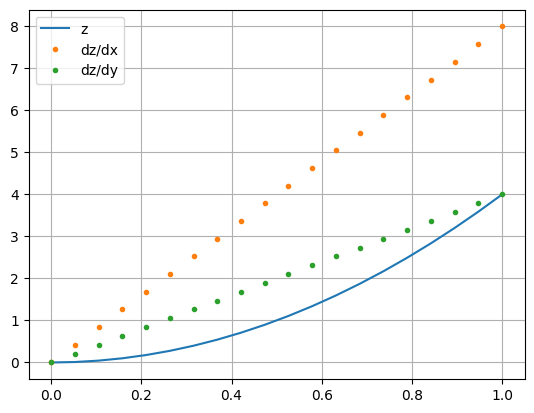

In [20]:
# Plot the function and gradients with respect to variables used in its graph
# .detach() is used when the computation graph is no longer needed
plt.plot(x.detach(), z.detach(), label='z')
plt.plot(x.detach(), dzdx, '.', label='dz/dx')
plt.plot(x.detach(), dzdy, '.', label='dz/dy')

plt.legend()
plt.grid(True)
plt.show()

## Neural Networks

Neste trecho instanciamos um modelo de rede neural com uma camada linear:

- A camada recebe vetores de entrada com 2 valores e retorna saídas com 3 valores.
- **model(x)** realiza a multiplicação peso * entrada + bias.
- Podemos acessar os pesos e bias diretamente com **.weight.data** e **.bias.data**.

In [21]:
model = torch.nn.Linear(2, 3)  # input size: 2 and output size: 3
x = torch.tensor([[1., 2.]])  # input
y = model(x)  # output

# access weight parameters
model.weight.data  # returns a tensor of shape (3, 2)
model.bias.data  # returns a tensor of shape (3)

tensor([ 0.5352, -0.6337, -0.3826])

## GPU Acceleration

Por fim, mostramos como utilizar a GPU se disponível:

- **torch.device** escolhe entre CPU e CUDA automaticamente.
- Tensores e modelos podem ser criados diretamente na GPU ou transferidos com **.to(device)**.
- O método **.cpu()** traz os dados de volta para a CPU.

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

a = torch.ones(4, device=device)  # cuda
b = torch.ones(4)  # cpu

# transfer to CUDA
b = b.to(device)
model = model.to(device)

# transfer back to CPU
a.cpu()

tensor([1., 1., 1., 1.])